In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import numpy as np

In [118]:
data_train = pd.read_csv('pol_regression.csv')
data_test = pd.read_csv('pol_regression.csv')

In [121]:
x_train = data_train['x'].values
y_train = data_train['y'].values

x_test = data_test['x'].values
y_test = data_test['y'].values

In [122]:
X = np.column_stack((np.ones(x_train.shape), x_train))
X

array([[ 1.        ,  0.50797903],
       [ 1.        ,  2.08147823],
       [ 1.        , -2.09095261],
       [ 1.        ,  0.10827605],
       [ 1.        ,  3.92946954],
       [ 1.        ,  3.96293089],
       [ 1.        , -3.7441469 ],
       [ 1.        , -2.92757122],
       [ 1.        , -4.48532797],
       [ 1.        , -0.59190156],
       [ 1.        , -4.70123789],
       [ 1.        , -0.43166776],
       [ 1.        ,  1.49144048],
       [ 1.        , -2.21512717],
       [ 1.        ,  1.76254902],
       [ 1.        ,  0.90862817],
       [ 1.        , -4.76018118],
       [ 1.        ,  0.58854088],
       [ 1.        , -2.40747553],
       [ 1.        , -0.84898803]])

In [124]:
XX = X.transpose().dot(X)

parameters = np.linalg.solve(XX, X.transpose().dot(y_train))
parameters = np.linalg.inv(XX).dot(X.transpose().dot(y_train))

parameters

array([-20.0998276 ,  14.90300421])

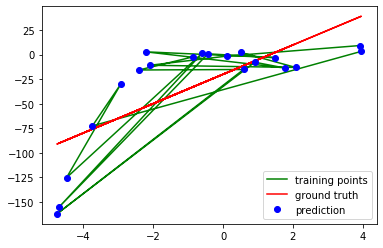

In [125]:
# Lets plot our function

import matplotlib.pyplot as plt

Xtest = np.column_stack((np.ones(x_test.shape), x_test))
ytest_predicted = Xtest.dot(parameters)

plt.figure()
plt.plot(x_test,y_test, 'g')
plt.plot(x_test, ytest_predicted, 'r')
plt.plot(x_train,y_train, 'bo')
plt.legend(('training points', 'ground truth', 'prediction'), loc = 'lower right')

plt.savefig('regression_LSS.png')
plt.show()

In [126]:
error = X.dot(parameters)
SSE = error.dot(error)
SSE

48823.474875422384

In [127]:
def getPolynomialDataMatrix(features_train, degree):
    X = np.ones(features_train.shape)
    for i in range(1,degree + 1):
        X = np.column_stack((X, features_train ** i))
    return X
    
print(getPolynomialDataMatrix(x_train, 5))

[[ 1.00000000e+00  5.07979026e-01  2.58042691e-01  1.31080275e-01
   6.65860302e-02  3.38243067e-02]
 [ 1.00000000e+00  2.08147823e+00  4.33255161e+00  9.01811183e+00
   1.87710034e+01  3.90714349e+01]
 [ 1.00000000e+00 -2.09095261e+00  4.37208282e+00 -9.14181799e+00
   1.91151082e+01 -3.99687854e+01]
 [ 1.00000000e+00  1.08276052e-01  1.17237034e-02  1.26939632e-03
   1.37445222e-04  1.48820260e-05]
 [ 1.00000000e+00  3.92946954e+00  1.54407309e+01  6.06738818e+01
   2.38416171e+02  9.36849081e+02]
 [ 1.00000000e+00  3.96293089e+00  1.57048212e+01  6.22371212e+01
   2.46641410e+02  9.77422862e+02]
 [ 1.00000000e+00 -3.74414690e+00  1.40186360e+01 -5.24878324e+01
   1.96522155e+02 -7.35807815e+02]
 [ 1.00000000e+00 -2.92757122e+00  8.57067324e+00 -2.50912563e+01
   7.34564398e+01 -2.15048959e+02]
 [ 1.00000000e+00 -4.48532797e+00  2.01181670e+01 -9.02365770e+01
   4.04740642e+02 -1.81539452e+03]
 [ 1.00000000e+00 -5.91901563e-01  3.50347461e-01 -2.07371210e-01
   1.22743343e-01 -7.2651

In [128]:
def pol_regression(features_train,y_train,degree):
    X = getPolynomialDataMatrix(features_train, degree)

    XX = X.transpose().dot(X)
    parameters = np.linalg.solve(XX, X.transpose().dot(y_train))

    return parameters

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

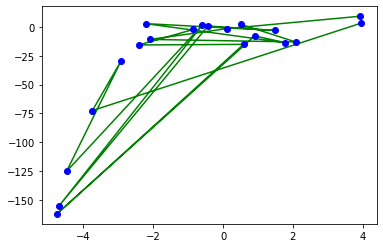

In [129]:
plt.figure()
plt.plot(x_test,y_test, 'g')
plt.plot(x_train,y_train, 'bo')

parameters1 = pol_regression(x_train,y_train,0)
Xtest1 =getPolynomialDataMatrix(x_test,0)
ytest1 = Xtest1.dot(parameters1)
plt.plot(x_test, ytest1, 'r')

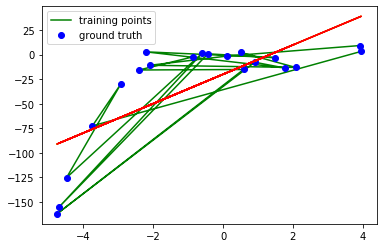

In [135]:
plt.figure()
plt.plot(x_test,y_test, 'g')
plt.plot(x_train,y_train, 'bo')

parameters2 = pol_regression(x_train,y_train,1)
Xtest2 =getPolynomialDataMatrix(x_test, 1)
ytest2 = Xtest2.dot(parameters2)
plt.plot(x_test, ytest2, 'y')
ytest_predicted = Xtest.dot(parameters)
plt.plot(x_test, ytest_predicted, 'r')
plt.legend(('training points', 'ground truth'))


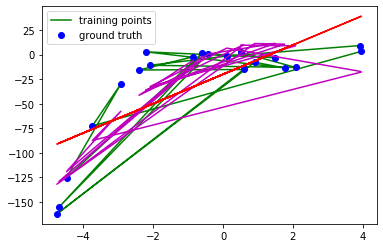

In [136]:
plt.figure()
plt.plot(x_test,y_test, 'g')
plt.plot(x_train,y_train, 'bo')

parameters3 = pol_regression(x_train,y_train,2)
Xtest3 = getPolynomialDataMatrix(x_test, 2)
ytest3 = Xtest3.dot(parameters3)
plt.plot(x_test, ytest3, 'm')
ytest_predicted = Xtest.dot(parameters)
plt.plot(x_test, ytest_predicted, 'r')

plt.legend(('training points', 'ground truth'))

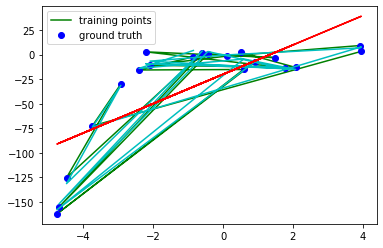

In [137]:
plt.figure()
plt.plot(x_test,y_test, 'g')
plt.plot(x_train,y_train, 'bo')
parameters4 = pol_regression(x_train,y_train,3)
Xtest4 =getPolynomialDataMatrix(x_test, 3)
ytest4 = Xtest4.dot(parameters4)
plt.plot(x_test, ytest4, 'c')
ytest_predicted = Xtest.dot(parameters)
plt.plot(x_test, ytest_predicted, 'r')
plt.legend(('training points', 'ground truth'))

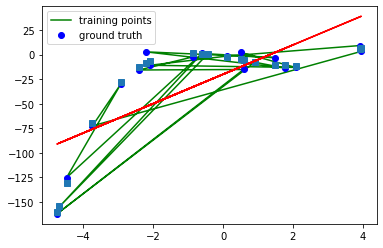

In [138]:
plt.figure()
plt.plot(x_test,y_test, 'g')
plt.plot(x_train,y_train, 'bo')
parameters5 = pol_regression(x_train,y_train,5)
Xtest5 =getPolynomialDataMatrix(x_test, 5)
ytest5 = Xtest5.dot(parameters5)
plt.plot(x_test, ytest5, 's')
ytest_predicted = Xtest.dot(parameters)
plt.plot(x_test, ytest_predicted, 'r')

plt.legend(('training points', 'ground truth'))

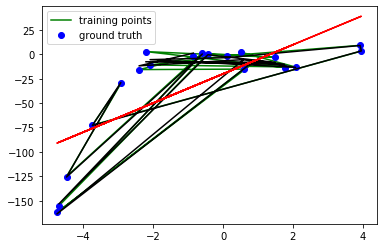

In [139]:
plt.figure()
plt.plot(x_test,y_test, 'g')
plt.plot(x_train,y_train, 'bo')
parameters10 = pol_regression(x_train,y_train,10)
Xtest10 = getPolynomialDataMatrix(x_test, 10)
ytest10 = Xtest10.dot(parameters10)
plt.plot(x_test, ytest10, 'black')
ytest_predicted = Xtest.dot(parameters)
plt.plot(x_test, ytest_predicted, 'r')

plt.legend(('training points', 'ground truth'))

In [141]:
SSEtrain = np.zeros((11,1))
SSEtest = np.zeros((11,1))

for i in range(1,10):
    
    Xtrain = getPolynomialDataMatrix(x_train, i) 
    Xtest = getPolynomialDataMatrix(x_test, i)
    
    parameters = pol_regression(x_train, y_train, i)  
    
    SSEtrain[i - 1] = np.mean((Xtrain.dot(parameters) - y_train)**2)
    SSEtest[i - 1] = np.mean((Xtest.dot(parameters) - y_test)**2)

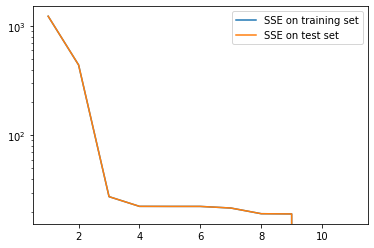

In [147]:
plt.figure();
plt.semilogy(range(1,12), SSEtrain)
plt.semilogy(range(1,12), SSEtest)
plt.legend(('SSE on training set', 'SSE on test set'))
plt.savefig('polynomial_evaluation.png')
plt.show()